<a href="https://colab.research.google.com/github/Iprass30/Kelas-Mahir-Pejuang-Data-2.0/blob/main/Rohman_Prasetyo_Wibowo_1900015024_MPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assalamualaikum warahmatullahi wabarakatuh.

Robbi Zidni Ilma Warzuqni Fahma

Semoga Allah memberi kemudahan untuk kita memperoleh ilmu yang bermanfaat.

Ini adalah notebook yang disusun untuk Kelas Mahir Pejuang Data Sains 2.0 .

##Import Library


In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

####Mengakses Dataset

In [302]:
df = pd.read_csv("https://raw.githubusercontent.com/Iprass30/Kelas-Mahir-Pejuang-Data-2.0/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


#Dataset diabetes, diambil dari rumah sakit Frankfurt, Jerman

#MINI PROJECT A
1. Masalah yang ingin diselesaikan adalah mengetahui hasil dari klasifikasi pasien yang memiliki penyakit diabetes yang berobat di rumah sakit Frankfurt, Jerman
2. Hipotesis yang dapat diambil adalah penyakit diabetes diketahui dengan pemeriksaan kandungan dalam darah
3. Data set yang mendukung hipotesis tersebut adalah data set tentang pemeriksaan pasien beserta umur mereka yang menjadi pengaruh dari penyakit diabetes.


#MINI PROJECT B

##Eksploratory Data Analysis

####Dimensi Data

In [303]:
df.shape #Dengan menggunakan syntax ini dapat diketahui jumlah baris dan kolom dalam data yang kita analisis
#Data memiliki 2000 baris dan 9 kolom

(2000, 9)

####Variabel,informasi, dan Tipe data Pada Dataset

In [304]:
df.columns.values #Disini dapat kita lihat feature yang ada pada data frame

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [305]:
df.dtypes #kita dapat melihat tipe data dari setiap feture dari data

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [306]:
df.info() #Dapat kita lihat info feture dari data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


####Statistik Data

In [307]:
df.describe() #Syntax ini mendeskripsikan statistik data 
#Dalam tabel terdapat model dalam statistika seperti nilai rata-rata, nilai minimum, dan nilai maksimum

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


####Mengecek Missing Data

In [308]:
df.isnull().sum()#Karena semua data bernilai nol maka semua baris dan kolom dalam data memiliki nilai

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

####Menampilkan data dalam bentuk distribusi Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

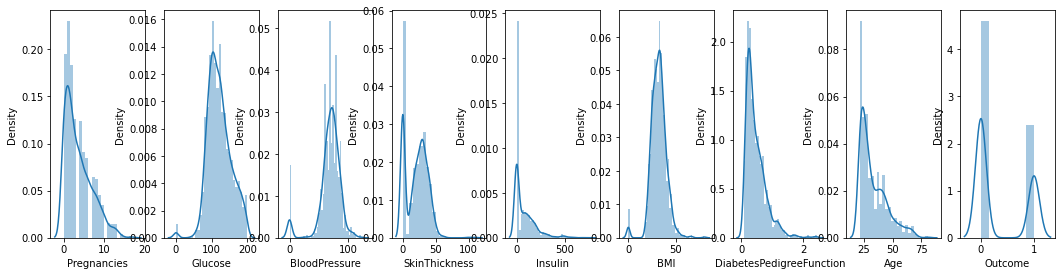

In [309]:
l = df.columns.values
number_of_columns=len(df.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

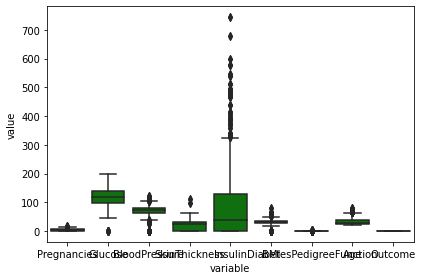

In [310]:
df=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df))
plt.tight_layout()

###Menghapus Outlier
Outlier adalah data yang berbeda dari data lainnya

Rentang interkuartil (IQR) adalah ukuran penyebaran statistik dan dihitung sebagai perbedaan antara persentil ke-75 dan ke-25. Ini diwakili oleh rumus IQR = Q3 - Q1. Baris kode di bawah menghitung dan mencetak kisaran interkuartil untuk setiap variabel dalam dataset.

Teknik ini menggunakan skor IQR yang dihitung sebelumnya untuk menghilangkan pencilan. Aturan praktisnya adalah bahwa segala sesuatu yang tidak berada dalam kisaran (Q1 - 1.5 IQR) dan (Q3 + 1.5 IQR) adalah pencilan, dan dapat dihapus.

Metode ini dipakai karena untuk identifikasi outlier awal digunakan metode boxplot.

In [311]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                          16.000
Outcome                       1.000
dtype: float64


In [312]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...
1994,1,79,60,42,48,43.5,0.678,23,0
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0


####Normalisasi Data

In [313]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.153846,0.610390,0.34375,0.583333,0.000000,0.473846,0.044025,0.604651,1.0
1,0.000000,0.259740,0.65625,0.516667,0.384615,0.615385,0.139263,0.046512,0.0
2,0.000000,0.590909,0.43750,0.700000,0.769231,0.741538,0.257862,0.069767,1.0
3,0.000000,0.837662,0.59375,0.533333,0.815385,0.870769,0.971249,0.860465,0.0
4,0.307692,0.357143,0.50000,0.283333,0.000000,0.227692,0.194070,0.162791,0.0
...,...,...,...,...,...,...,...,...,...
1647,0.076923,0.227273,0.31250,0.700000,0.147692,0.778462,0.539084,0.046512,0.0
1648,0.153846,0.201299,0.37500,0.400000,0.169231,0.353846,0.262354,0.279070,0.0
1649,0.615385,0.876623,0.50000,0.700000,0.400000,0.446154,0.575921,0.348837,1.0
1650,0.461538,0.266234,0.59375,0.000000,0.000000,0.400000,0.273136,0.488372,0.0


####Memilih Variable Target & Variabel Independent

In [315]:
y=df_clear['Outcome']
X=df_clear.drop(columns=['Outcome'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[1 0 1 ... 1 0 0]
[[2.00e+00 1.38e+02 6.20e+01 ... 3.36e+01 1.27e-01 4.70e+01]
 [0.00e+00 8.40e+01 8.20e+01 ... 3.82e+01 2.33e-01 2.30e+01]
 [0.00e+00 1.35e+02 6.80e+01 ... 4.23e+01 3.65e-01 2.40e+01]
 ...
 [8.00e+00 1.79e+02 7.20e+01 ... 3.27e+01 7.19e-01 3.60e+01]
 [6.00e+00 8.50e+01 7.80e+01 ... 3.12e+01 3.82e-01 4.20e+01]
 [2.00e+00 8.10e+01 7.20e+01 ... 3.01e+01 5.47e-01 2.50e+01]]


In [316]:
#Syntax untuk split data
y = df.Outcome.values
x_data = df.drop(['Outcome'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state=80)

x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

####Perhitungan KNN Dengan Scikit Learn

In [317]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 89.80%


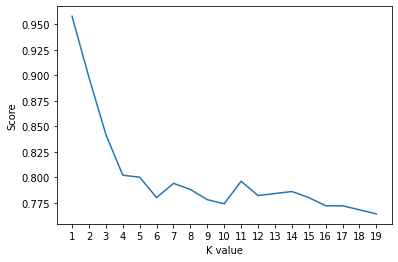

Maksimum nilai KNN adalah 95.80%


In [318]:
#Mencari nilai k yang terbaik
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maksimum nilai KNN adalah {:.2f}%".format(acc))

####Matrik Konfusi KNN

In [319]:
#Membuat matriks dari nilai sebenarnya dan nilai prediksi
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[309,   6],
       [ 45, 140]])

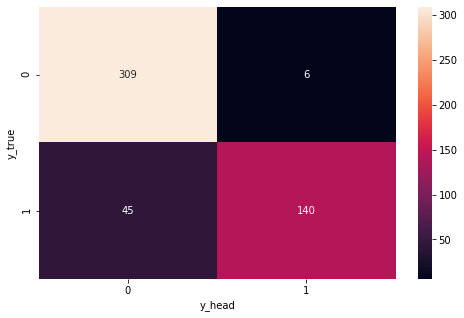

In [320]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

####Perhitungan NB Dengan Scikit Learn

In [321]:
#Melihat akurasi
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

prediction_nb = nb.predict(x_test.T)
acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Akurasi Naive Bayes: {:.2f}%".format(acc))

Akurasi Naive Bayes: 75.60%


####Matrik Konfusi NB

In [322]:
#Membuat matriks dari nilai sebenarnya dan nilai prediksi
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[309,   6],
       [ 45, 140]])

####Perhitungan Random Forest Classifier Dengan Scikit Learn

In [323]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 96.00%


####Perhitungan SVM Dengan Scikit Learn

In [324]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 78.80%


####Perhitungan Multi Layer Perceptron Dengan Scikit Learn

In [325]:

MLPC = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
MLPC.fit(x_train.T, y_train.T)

acc = MLPC.score(x_test.T,y_test.T)*100

accuracies['MLPC'] = acc
print("MLP Accuracy Score : {:.2f}%".format(acc))

MLP Accuracy Score : 78.80%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


####Perhitungan Linier Discriminant Analysis Dengan Scikit Learn

In [326]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train.T, y_train.T)
acc = lda.score(x_test.T,y_test.T)*100

accuracies['LDA'] = acc
print("LDA Accuracy Score : {:.2f}%".format(acc))

LDA Accuracy Score : 75.60%


##Keseimpulan
1. Dari hasil analisis data dapat didapatkan tingkat akurasi lebih dari 90% pada bagian Perhitungan KNN Dengan Scikit Learn pada tahap mencari nilai k (95,80%) terbaik dan Perhitungan Random Forest Classifier Dengan Scikit Learn (96%).
2. Penyakit diabetes dapat dianalisi dengan pemeriksaan dan dengan Machine Learning Penyakit dapat diklasifikasikan dengan nilai akuraso.
3. Hasil Akhir dari analisis menggunakan Machine Learning menghasilkan outcome yaitu positif terkena diabetes yang dilambangkan 1 dan negatif terkena diabetes yang dilambangkan 0.